<a href="https://colab.research.google.com/github/romario-pereira/analisando_dados_airbnb/blob/main/Analisando_os_Dados_do_Airbnb_%7C_Santiago_Chile_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/romario-pereira/analisando_dados_airbnb/main/santiago.png">

## <font color=blue>**Analisando os dados do Airbnb - <font color=red> *Santiago | Chile***
*by [Romario Pereira](https://github.com/romario-pereira)*</center>

---
###  **O que é Airbnb?**


O [Airbnb](https://www.airbnb.com.br/)  é uma plataforma de aluguel de hospedagens, que permite que qualquer pessoa disponibilize ou reserve acomodações ao redor do mundo. Seu grande diferencial é oferecer alternativas às hospedagens tradicionais, incluindo casas e apartamentos em bairros residenciais no Brasil e em mais 220 países.

O Airbnb nasceu em 2007, quando dois anfitriões receberam três hóspedes em sua casa em São Francisco. Hoje, a plataforma conta com **4 milhões de anfitriões** que já receberam mais de **1 bilhão de hóspedes** em quase todos os países do mundo. Todos os dias, os anfitriões oferecem acomodações e atividades únicas, que possibilitam aos viajantes vivenciar o mundo de uma forma mais autêntica e conectada.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*. E é exatamente isso que vamos fazer agora! Bora?!

<center><img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

## Obtenção dos Dados


Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Santiago (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/chile/rm/santiago/2021-12-25/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://drive.google.com/file/d/192cDSG35rF3rzmPH6c1hu828zgaGKPyS/view?usp=sharing) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.

In [2]:
# importando os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline


In [3]:
# importando o arquivo listings.csv para um DataFrame
df = pd.read_csv ("http://data.insideairbnb.com/chile/rm/santiago/2021-12-25/visualisations/listings.csv")

## Análise dos Dados


Esta etapa tem por objetivo nos permitir um entendimento inicial de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - O número de avaliações que a listagem tem (nos últimos 12 meses)
* `license` - A licença/autorização/número de registro

Iciamos nossa análise verificando as 5 primeiras entradas do nosso **Dataset**.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,30950,"Apartment Providencia, Santiago",132845,Pamela,NaN,Providencia,-33.43174,-70.61845,Entire home/apt,260000,180,12,2021-08-30,0.22,1,276,4,NaN
1,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,45652,3,0,NaN,NaN,2,176,0,NaN
2,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,46513,1,46,2021-11-04,0.34,3,89,1,NaN
3,53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,149999,2,38,2021-05-22,0.57,1,266,1,NaN
4,55303,Plaza Lyon piso 3,261079,Hernan,NaN,Providencia,-33.42250,-70.60920,Entire home/apt,70000,2,2,2016-11-28,0.03,3,365,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

**Obs:** Este *dataset* que baixamos é a versão "resumida" do Airbnb.

In [5]:
# identificando o volume de dados do DataFrame e os tipos de variáveis
print ("Entradas: \t {}" .format(df.shape[0]))
print ("Variaveis: \t {} \n" .format(df.shape[1]))

display(df.dtypes)


Entradas: 	 9139
Variaveis: 	 18 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que as colunas `neighbourhood_group` e `license` possuem 100% e 99%, respectivamente, dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull() .sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
license                           0.988401
reviews_per_month                 0.356604
last_review                       0.356604
name                              0.000438
host_name                         0.000438
longitude                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

#### Por se tratar de colunas sem dados e que não usaremos neste trabalho, iremos excluir as colunas com dados ausentes.

In [7]:
# Excluindo as colunas com valores ausentes >30%
df.drop(columns=['neighbourhood_group', 'license', 'reviews_per_month', 'last_review'], inplace=True)

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

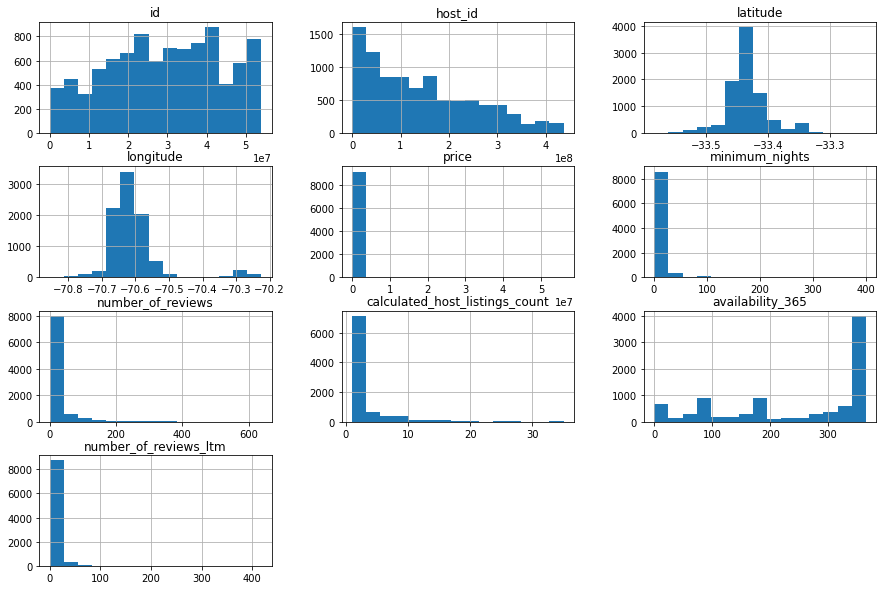

In [8]:
# plotando o histograma das variáveis numéricas
df.hist(bins=15 , figsize=(15,10));


### **Q4. Há outliers presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis 'price', 'minimum_nights' e 'number_of_reviews'.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

Resumo estatístico por meio do método describe()
Plotar boxplots para a variável.

In [9]:
# analisando o resumo estatístico das variáveis numéricas
df[['minimum_nights', 'price','number_of_reviews',
    'calculated_host_listings_count', 'number_of_reviews_ltm']].describe()

,minimum_nights,price,number_of_reviews,calculated_host_listings_count,number_of_reviews_ltm
count,9139.000000,9.139000e+03,9139.000000,9139.000000,9139.000000
mean,7.251231,7.999007e+04,17.942554,3.025605,4.292811
std,26.967635,8.707143e+05,40.411300,4.312533,13.053941
min,1.000000,0.000000e+00,0.000000,1.000000,0.000000
25%,1.000000,2.153400e+04,0.000000,1.000000,0.000000
50%,2.000000,3.500000e+04,2.000000,1.000000,0.000000
75%,3.000000,5.400000e+04,16.000000,3.000000,3.000000
max,400.000000,5.598833e+07,638.000000,35.000000,418.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

A variável *price* possui 75% do valor abaixo de 54000, porém seu valor máximo é 55988332.

Na coluna *(minimum_nights)* a quantidade máxima de noites está em 400 dias.

### **Tratando as variaveis 'price' e 'minimum_nights', com método estatístico IQR.** 

In [10]:
#Identificando os outliers para variavel price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variavel price:', IQR_price )

#Definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price:', sup_price)
print('Limite inferior de price:', inf_price)

IQR da variavel price: 32466.0
Limite superior de price: 102699.0
Limite inferior de price: -27165.0


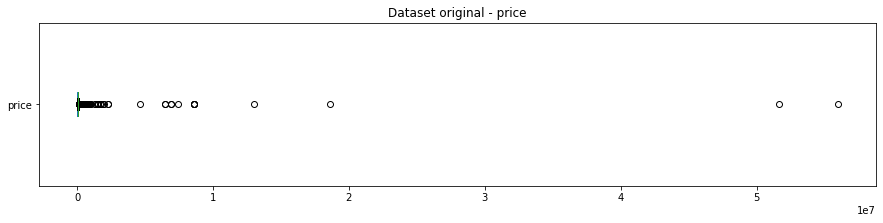

O dataset possui 9139 colunas
878 Entradas acima de 102699.0
Representam 9.61% do dataset


In [11]:
#Verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind = 'box', vert=False);
ax.set_title('Dataset original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 102699.0".format(len(df[df.price > 102699.0])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 102699.0]) / df.shape[0])*100))

In [12]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  2.0
Limite superior de minimum_nights:  6.0
Limite inferior de minimum_nights:  -2.0


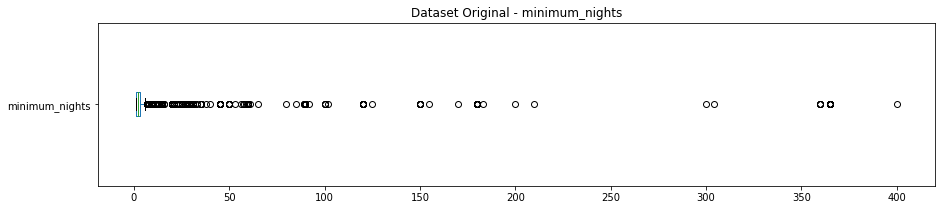

O dataset possui 9139 colunas
1343 Entradas acima de 102699.0
Representam 14.70% do dataset


In [13]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 102699.0".format(len(df[df.minimum_nights > 6.0])))
print("Representam {:.2f}% do dataset".format((len(df[df.minimum_nights > 6.0]) / df.shape[0])*100))

In [14]:
#limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 102699.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 7].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ',df_clean.shape)

Shape antes da limpeza:  (9139, 14)
Shape após a limpeza:  (7367, 14)


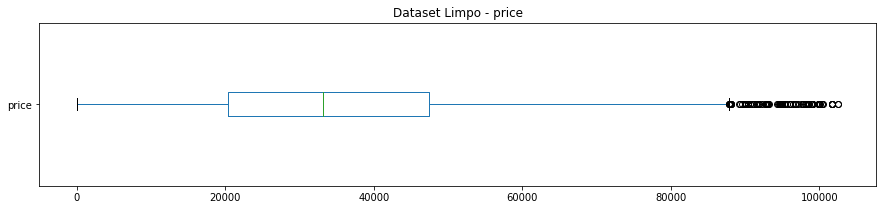

Tamanho original: 9139 
Tamanho atual: 7367 


In [15]:

# verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} ".format(df.shape[0]))
print("Tamanho atual: {} ".format(df_clean.shape[0]))

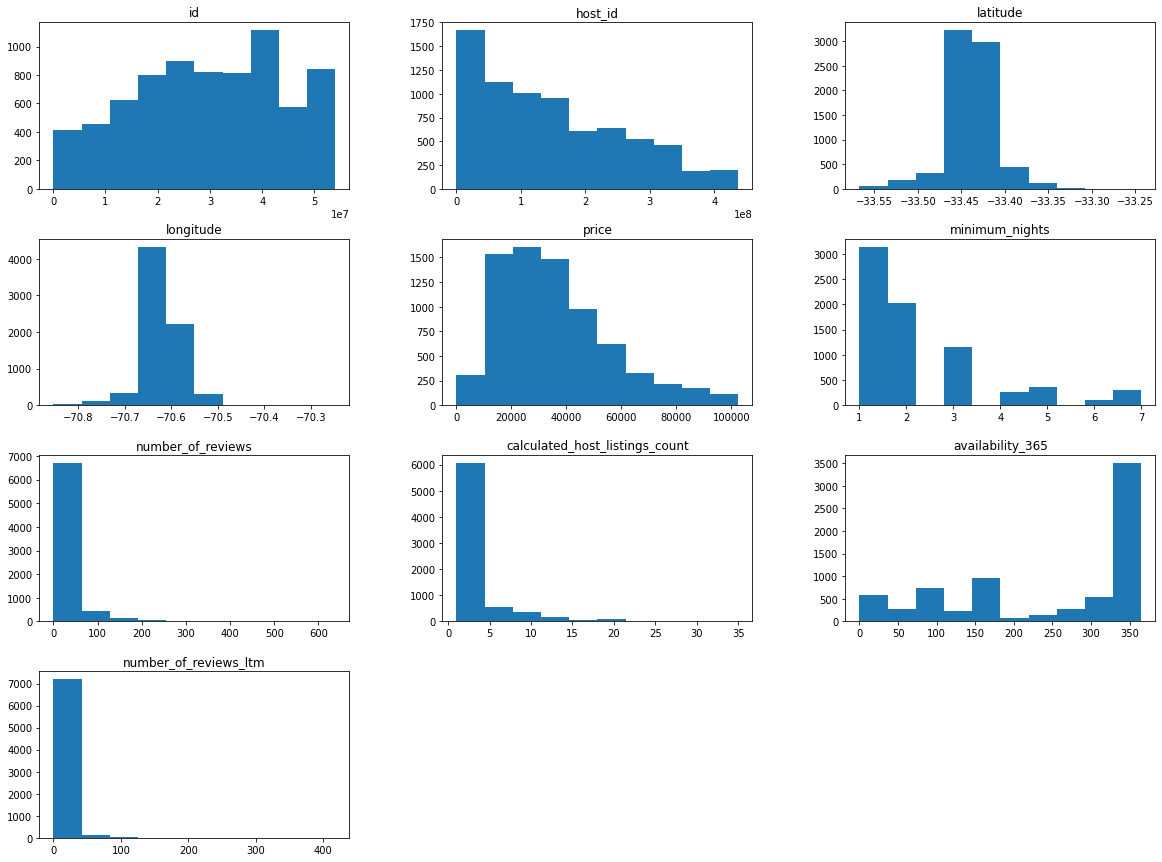

In [16]:
# verificando as distribuições limpas
df_clean.hist(figsize=(20,15), grid=False);

Importante frisar que não usaremos nessa análise as variaveis *number_of_reviews*, *calculated_host_listing_count* e *number_of_reviews_ltm*. Portanto, estes ainda podem conter outliers.

In [17]:
# analisando o resumo estatístico limpo
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7367.0,7367.0,7367.0,7367.0,7367.0,7367.0,7367.0,7367.0,7367.0,7367.0
mean,29654273.2,147122186.3,-33.4,-70.6,36374.8,2.2,19.2,3.0,249.2,5.0
std,14533125.7,112603872.1,0.0,0.0,20073.1,1.5,42.3,4.2,127.3,14.4
min,49392.0,28488.0,-33.6,-70.9,33.0,1.0,0.0,1.0,0.0,0.0
25%,18459168.0,49513152.0,-33.4,-70.6,20417.0,1.0,0.0,1.0,143.5,0.0
50%,30478678.0,125183198.0,-33.4,-70.6,33143.0,2.0,2.0,1.0,322.0,0.0
75%,41217970.5,229453641.0,-33.4,-70.6,47375.0,3.0,18.0,3.0,364.0,3.0
max,53972850.0,436974906.0,-33.2,-70.2,102502.0,7.0,638.0,35.0,365.0,418.0


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [18]:
# Analisando o tipo de imovél mais alugado
df_clean.room_type.value_counts()


Entire home/apt    3920
Private room       3195
Shared room         177
Hotel room           75
Name: room_type, dtype: int64

In [19]:
# Analisando o tipo de imovél mais alugado (%)
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.532103
Private room       0.433691
Shared room        0.024026
Hotel room         0.010181
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara?**

Uma maneira de verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.

In [20]:
# Analisando a média de preços por bairros

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:12]

neighbourhood
Lo Espejo       97540.000000
Lo Barnechea    56479.484211
Las Condes      45777.141304
Vitacura        44203.011628
Cerro Navia     41657.833333
Pudahuel        40383.957447
Providencia     40229.990673
Renca           35150.000000
Huechuraba      34851.605263
Recoleta        34159.076923
Santiago        33931.069845
Peñalolén       33801.750000
Name: price, dtype: float64

Analisando os valores acima, podemos verificar que os bairros `Lo Espejo` e `Cerro Navia` possuem uma média de valor alta, porém com poucas entradas, como podemos ver abaixo. Neste caso, iremos desconsiderar estes bairros de nossa análise, devido a baixa representatividade.

O bairro de Lo Barnachea seguido de Las Condes e Vitacura, são os mais caros com média de preço de 56479.48 (383,91), 45777.14 (311,16) e 44203.01(R$300,46) respectivamente.

In [21]:
#Analisando a quantidade de entradas por bairro
df_clean.neighbourhood.value_counts()

Santiago               2706
Providencia            1501
Las Condes             1104
Ñuñoa                   615
Recoleta                195
Vitacura                172
Estación Central        123
San Miguel              110
La Florida              109
La Reina                106
Macul                    99
Lo Barnechea             95
Maipú                    69
Peñalolén                56
Independencia            52
Pudahuel                 47
San Joaquín              43
Huechuraba               38
Quinta Normal            34
La Cisterna              30
Quilicura                15
Renca                     9
Conchalí                  7
Lo Prado                  7
Cerrillos                 6
Cerro Navia               6
La Granja                 4
Pedro Aguirre Cerda       4
El Bosque                 4
Lo Espejo                 1
Name: neighbourhood, dtype: int64

### **Q7. plotando os imóveis pela latitude-longitudet?**

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Entretanto, optamos por plotar uma fração de 0.04 da nossa amostra, usando o *folium*



In [22]:
# verificando o tamanho do dataset
print('Dataset original: ', df_clean.shape)

# criando um dataset menor
df_map = df.sample(frac=0.04, random_state=0)

# verificando o tamanho do dataset
print('Dataset para o plot: ', df_map.shape)


Dataset original:  (7367, 14)
Dataset para o plot:  (366, 14)


In [23]:
# criando as variáveis necessárias
latitude = df_map.latitude.values
longitude = df_map.longitude.values
listings = df_map.room_type.values

In [24]:
# criando o mapa
sntg = folium.Map(location=[-33.4718999,-70.9100267],
                 zoom_start=8)
sntg

In [25]:
# adicionando os marcadores
for lat, lon, listing in zip(latitude, longitude, listings):
    folium.Marker(location=[float(lat), float(lon)], popup=listing).add_to(sntg)
# plotando o mapa
sntg.save('sntg_map.html')
sntg

## Conclusões


Fizemos uma análise na base de dados resumida do Airbnb, entretanto, pode-se concluir que a análise é importantíssima no processo de alugar um imóvel antes de realizar uma viagem, pois através dela é possível obter muitas informações valiosas dos dados.

Como verificamos, existem outliers em algumas das variáveis e a presença destes pode implicar em alguns resultados distorcidos na nossa análise. Por isso, a importancia de tratarmos todos eles.

Logo, se for para Santigo, saiba que 75% das pessoas passam ao menos 3 noites por lá. Caso queira uma opnião pessoal de onde se hospedar, fique em Providencia. É proximo dos principais pontos turisticos(dá pra ir de metro para varios lugares) e como podemos verificar pelas entradas, é onde possui mais imoveis para ficar e tem uma média de preço de 40229.99 pesos chilenos, equivalente a R$273,45 na cotação atual.
